## 데이터 전처리, 모델 제작용 변수 선택, 생성

- PassengerId int64  승객 id
- Survived int64      0:사망, 1: 생존
- Pclass int64         티켓등급: 1등석, 2등석, 3등석
- Name object       성명
- Sex object          성별
- Age float64         나이
- SibSp int64         승선중인 형제나 배우자의 수
- Parch int64         승선중인 부모나 자녀의 수     
- Ticket object       티케 번호
- Fare float64         티켓 요금
- Cabin object        반 번호 
- Embarked object  승선한 항구의 이름 C: Cherbourg, Q:Queenstown, S: Southampton

In [109]:
import warnings
warnings.filterwarnings("ignore")

import random
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [110]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

#2개의 Dataframe을 연결 병합, srot=False: 병합후 index에 따라 정렬
df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [111]:
#결측치 확인
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 티켓등급별 중위수를 구하여 Fare가 결측치인 승객의 Fare에 값을 할당

In [112]:
# 파생 변수 : 기존의 변수에 사칙연산을 가하여 정확도를 높이는 변수를 추가하는 기법
# 티켓 등급별 평균 요금 파생 변수의 추가
fare_mean = df[['Pclass','Fare']].groupby('Pclass').mean() #평균은 이상치의 영향을 받음. median권장
fare_mean

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [113]:
# 파생 변수 : 기존의 변수에 사칙연산을 가하여 정확도를 높이는 변수를 추가하는 기법
# 티켓 등급별 평균 요금 파생 변수의 추가
Fare_median = df[['Pclass','Fare']].groupby('Pclass').median()
Fare_median

,Fare
Pclass,
1,60.0000
2,15.0458
3,8.0500


In [114]:
#티켓 등급별 평균 요금
Fare_median = df[['Pclass','Fare']].groupby('Pclass').median().reset_index()
Fare_median

,Pclass,Fare
0,1,60.0000
1,2,15.0458
2,3,8.0500


In [115]:
Fare_median.columns = ['Pclass','Fare_median']
Fare_median

,Pclass,Fare_median
0,1,60.0000
1,2,15.0458
2,3,8.0500


In [116]:
# 파생 변수의 병합
# Pclass 변수를 기준으로 join, left: df 기준으로 df는 모든 관측치가 병합됨.
df = pd.merge(df, Fare_median, on='Pclass', how='left')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_median
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8.05
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,60.00


In [117]:
# Fare가 결측치(NaN,null)값인 경우 평균값으로 대체
cdt = df['Fare'].isnull()
cdt

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1309, dtype: bool

In [118]:
df[cdt] #Pclass가 3이므로 3등급의 Fare의 중위수가 할당

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_median
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,8.05


In [119]:
#Fare가 결측치(NaN, null)값인 경우 중위수로 대체
df.loc[cdt, 'Fare'] = df['Fare_median']
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Fare_median       0
dtype: int64

In [120]:
df.loc[1042:1044,:] #index 1043 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_median
1042,1043,NaN,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C,8.05
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.0500,NaN,S,8.05
1044,1045,NaN,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S,8.05


In [121]:
df= df.drop('Fare_median',axis=1)

In [122]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.276193
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.743584
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### 호텔 데이터의 전처리, 호칭에 따라서 생존율이 차이가 있는지 검토

In [123]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [124]:
type(df['Name'].head(10))

pandas.core.series.Series

In [125]:
strs='ABC,DEF,GHI.JKL'
print(strs.split(',')) 
print(strs.split(',', 1))# 처음 기준 1개를 분할
print(strs.split(',', 2))# 처음 기준 2개를 분할
print(strs.split(',.')) # --> 작동 안됨 X
print(strs.split('[,.]'))# --> 작동 안됨 X
print(strs.split('./'))# --> 작동 안됨 X

import re # 정규 표현식 지원 모듈
print(re.split('[,.]',strs))


['ABC', 'DEF', 'GHI.JKL']
['ABC', 'DEF,GHI.JKL']
['ABC', 'DEF', 'GHI.JKL']
['ABC,DEF,GHI.JKL']
['ABC,DEF,GHI.JKL']
['ABC,DEF,GHI.JKL']
['ABC', 'DEF', 'GHI', 'JKL']


In [126]:
# name_df = df['Name'].split('[..]') # 'Series' object has no attribute 'split'
name_df = df['Name'].str.split('[,.]')
print(name_df.head(3))
print(type(name_df)) # <class 'pandas.core.series.Series'>
print(type(name_df[0])) # <class 'list'>
print(type(name_df[0][0]))
print(name_df[0][0])
print(name_df[0][1])
print(name_df[0][2])

0                          [Braund,  Mr,  Owen Harris]
1    [Cumings,  Mrs,  John Bradley (Florence Briggs...
2                           [Heikkinen,  Miss,  Laina]
Name: Name, dtype: object
<class 'pandas.core.series.Series'>
<class 'list'>
<class 'str'>
Braund
 Mr
 Owen Harris


In [127]:
# 처음 2개를 분할 후 나머지 모두 합쳐서 출력, DataFrame으로 return
name_df = df['Name'].str.split('[,.]', 2, expand=True)
name_df.head(3)

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina


In [128]:
name_df.columns = ['family_name', 'honorific', 'name']
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [129]:
name_df["family_name"] =name_df["family_name"].str.strip() # 공백 제거
name_df["honorific"] =name_df["honorific"].str.strip()
name_df["name"] =name_df["name"].str.strip()
name_df.head()

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry


In [130]:
name_df["honorific"].value_counts() # 호칭별 빈도 분석

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [131]:
df = pd.concat([df, name_df], axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)


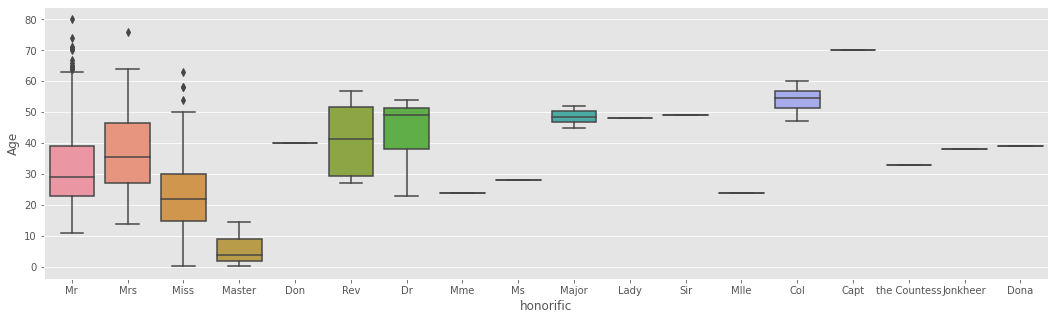

In [132]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='honorific', y='Age', data=df)
plt.show()

In [133]:
# 호칭별 나이의 평균
df[['honorific', 'Age']].groupby('honorific').mean()


,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [134]:
print(train_df.columns)
print(type(train_df.columns))
print(train_df.columns[0])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
PassengerId


In [135]:
# 호칭별 생존률의 차이
# name_df는 train_df, test_df가 결합되어 처리되었음
# df = pd.concat([train_df,test_df],sort = False).reset_index(drop=True)
# [train_df,name_df[0:len(train_df)]]: train_df에 해당하는 호칭 관측치만 필터링
train_df = pd.concat([train_df,name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
# [test_df,name_df[0:len(test_df)]]: test_df에 해당하는 호칭 관측치만 필터링
test_df = pd.concat([test_df,name_df[len(train_df):].reset_index(drop=True)],axis=1)
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df

PassengerId       
Survived               0      1
honorific                      
Capt                 1.0    NaN
Col                  1.0    1.0
Don                  1.0    NaN
Dr                   4.0    3.0
Jonkheer             1.0    NaN
Lady                 NaN    1.0
Major                1.0    1.0
Master              17.0   23.0
Miss                55.0  127.0
Mlle                 NaN    2.0
Mme                  NaN    1.0
Mr                 436.0   81.0
Mrs                 26.0   99.0
Ms                   NaN    1.0
Rev                  6.0    NaN
Sir                  NaN    1.0
the Countess         NaN    1.0

In [136]:
df.isnull().sum() # 결측치가 많음

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

In [138]:
# Age 결측치가 263건으로 매우 많음, 모든 승객의 나이 기준 중위수보다는
# 호칭별 나이 기준의 중위수가 좀 더 정확도가 높을것으로 판단됨.
# 호칭별 중위수의 산출
honorific_age_median = df[["honorific","Age"]].groupby(['honorific']).median().reset_index()

In [139]:
honorific_age_median.columns=['honorific', 'honorific_Age']
honorific_age_median.head(3)

,honorific,honorific_Age
0,Capt,70.0
1,Col,54.5
2,Don,40.0


In [141]:
df = pd.merge(df,honorific_age_median, on='honorific', how='left')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,honorific_Age
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,29.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),35.5


In [142]:
df.loc[(df['Age'].isnull()), 'Age'] = df['honorific_Age']
df.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            2
family_name         0
honorific           0
name                0
honorific_Age       0
dtype: int64

In [143]:
df = df.drop(['honorific_Age'], axis = 1) # 변수 삭제
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)


#### 가족 인원수 추가하기
- Parch: 승선중인 부모나 자녀의 수, SibSp: 승선중인 형제나 배우자의 수

In [148]:
df["family_num"] = df["Parch"] + df["SibSp"]
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1


In [149]:
df["family_num"].value_counts() # 같이 탑승한 동승자의 수

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [150]:
# alone 변수를 추가하고 family_num 값이 0인 관측치의 경우 alone값을 1로 할당
# 그외는 NaN 할당
df.loc[df["family_num"] ==0, "alone"] = 1
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0


In [151]:
# alone이 NaN인 값을 0으로 변경, inplace=True: 원본 Dataframe 변경
df["alone"].fillna(0, inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,family_num,alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,1,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),1,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,0,1.0


In [152]:
# 변수 삭제
df = df.drop(["PassengerId","Name","family_name","name","Ticket","Cabin"],axis=1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0


In [154]:
# Mr, Miss, Mrs, Master 이외는 other로 통합, ~: not
df.loc[~((df["honorific"] =="Mr") |
    (df["honorific"] =="Miss") |
    (df["honorific"] =="Mrs") |
    (df["honorific"] =="Master")), "honorific"] = "other"

df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [155]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0


In [159]:
df["Embarked"].fillna("missing", inplace=True)
df.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
honorific       0
family_num      0
alone           0
dtype: int64

### 카테고리 변수의 수치화, 문자열은 통계를 적용하기 어려움

In [156]:
categories = df.columns[df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [160]:
for cat in categories:
    print(cat)

Sex
Embarked
honorific


In [165]:
# 정수로 변환
from sklearn.preprocessing import LabelEncoder

for cat in categories:
    le = LabelEncoder() # 문자열 -> 정수, 정수는 알파벳 순서 적용
    if df[cat].dtypes == "object": # 문자열   
        le = le.fit(df[cat])       # 변환을 위한 초기화
        df[cat] = le.transform(df[cat]) # 변환
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [166]:
df.describe() # Survived Nan인 경우 count에서 제외됨.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.644003,29.432521,0.498854,0.385027,33.276193,1.495034,1.910619,0.883881,0.603514
std,0.486592,0.837836,0.478997,13.163767,1.041658,0.865560,51.743584,0.816130,0.794930,1.583639,0.489354
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.500000,1.000000,0.000000,31.275000,2.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,3.000000,4.000000,10.000000,1.000000


In [168]:
# 전처리가 된 데이터를 다시 훈련과 테스트로 분할
df.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
honorific       0
family_num      0
alone           0
dtype: int64

In [172]:
# Survived 변수가 418개의 결측치가 있는 이뉴는 test는  Survived를 예측해야함으로
# Survived 컬럼이 
# 결론적으로 DataFrame 병합 시 값이 없으면 NaN이 할당됨.
print(test_df.shape) 
print(test_df.columns)

(418, 14)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_name', 'honorific',
       'name'],
      dtype='object')


In [173]:
# 훈련 데이터를 독립변수(설명 변수, 원인 변수)와 종속변수(결과 변수)로 분리
# 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
#      'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_name', 'honorific',
#       'name'  -- > Survived(종속 변수, 결과 변수, traget)
# 1번 df["Survived"].isnull() --> Survived가 결측치인 관측치 선택
# 2번 ~df["Survived"].isnull() --> Survived가 결측치가 아닌 관측치 선택
# 3번 .drop("Survived",axis=1) --> Survived 삭제
# 4번 reset_index(drop=True) --> index 다시 지정
x_train = df[~df["Survived"].isnull()].drop("Survived",axis=1).reset_index(drop=True)
x_train.head()

418
418


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [174]:
y_train = train_df['Survived'] # 종속변수(결과 변수, traget, 찾아야 할 목표값)
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [175]:
# test_df는 처음부터 Survived 변수가 없어서 NaN값을 가지고 있었음.
x_test = df[df["Survived"].isnull()].drop("Survived",axis=1).reset_index(drop=True)
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,3,1,34.5,0,0,7.8292,1,2,0,1.0
1,3,0,47.0,1,0,7.0000,2,3,1,0.0
2,2,1,62.0,0,0,9.6875,1,2,0,1.0
3,3,1,27.0,0,0,8.6625,2,2,0,1.0
4,3,0,22.0,1,1,12.2875,2,3,2,0.0


In [177]:
# 원본 데이터와 전처리된 데이터의 구조 비교
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
print(train_df.shape)
print(test_df.shape)
print(df.shape)

(891, 12)
(418, 11)
(1309, 11)


In [178]:
# 전처리된 데이터의 구조
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(891, 10)
(891,)
(418, 10)


In [179]:
# 전처리된 데이터를 csv 파일로 저장
x_train.to_csv('./data/x_train.csv', index=False)
y_train.to_csv('./data/y_train.csv', index=False)
x_test.to_csv('./data/x_test.csv', index=False)